unsupervised data
no labels

Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's

In [46]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
#1.Load Data
df = pd.read_csv("C:/Users/Acer Nitro5/Desktop/housing.csv")

In [48]:
#2.Data Inspection
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [49]:
print(df.head())
print(df.shape)

   0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                              
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                              
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                              
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                              
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                              
(505, 1)


In [50]:
#De limiter by whitespaces
#my csv file has no header
column_name = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS','RAD', 'TAX','PTRATIO','B', 'LSTAT', 'MEDV']
df = pd.read_csv("C:/Users/Acer Nitro5/Desktop/housing.csv", delim_whitespace = True, names = column_name)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
print(df.shape)

(506, 14)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [53]:
#pd.to

In [54]:
#Check if there is a missing values 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [55]:
#NaN - pandas -> Not a Number -> missing value
#NULL -> Empty Value
#isNULL -> detect both NaN and NULL values in DF
#A Whitespace has a value

In [56]:
df.describe().T
#Data is skew to its original distribution

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

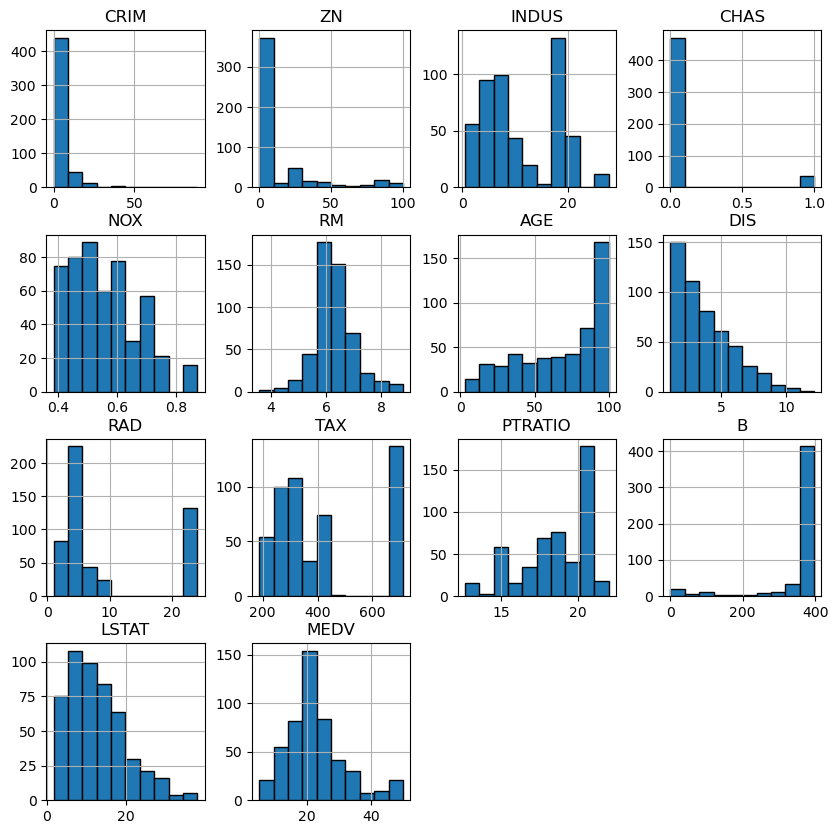

In [57]:
plt.figure(figsize=(10,10))
df.hist(figsize=(10,10), edgecolor='black')
plt.show

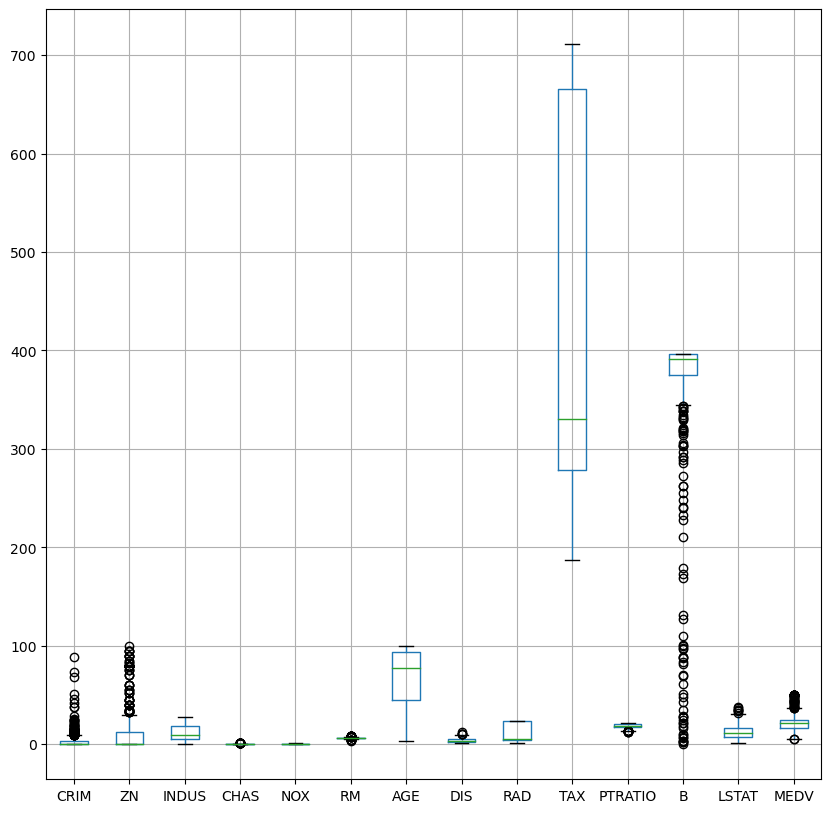

In [58]:
#3.1 Check for missing values
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

In [59]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [60]:
#3.2 Check for Duplicates
df.duplicated().sum()

#3.3 If got missing values or outliers -->deal with this data

0

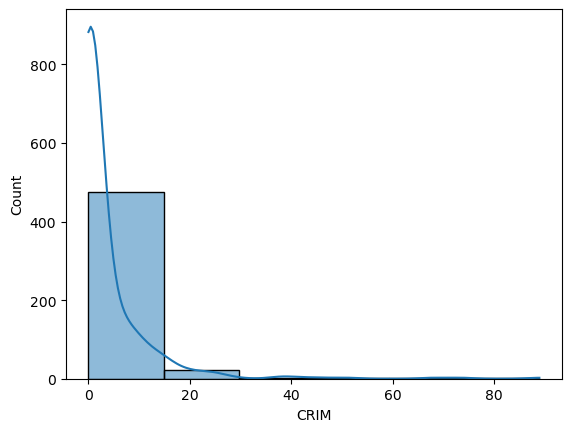

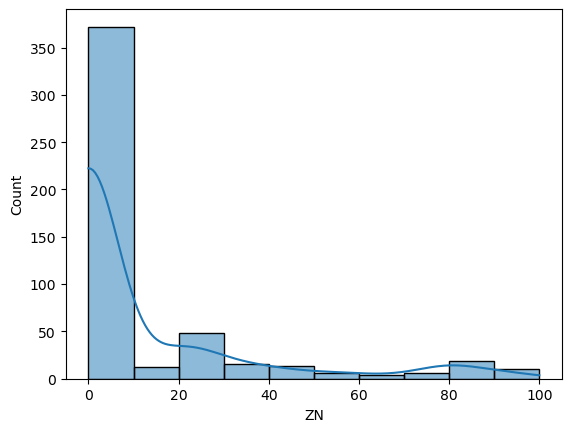

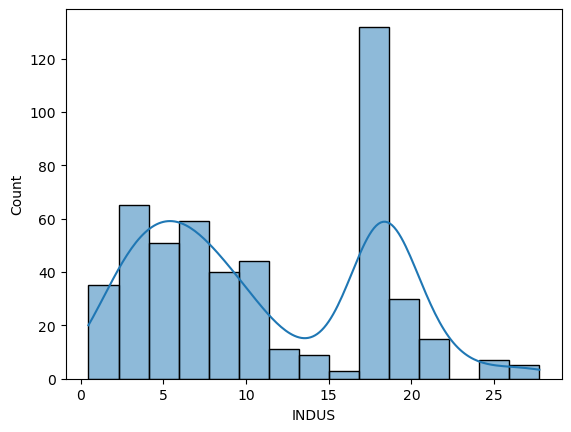

In [61]:
#4.0 Data Visualization
sns.histplot(df['CRIM'], bins = 6, kde= True)
plt.show()

sns.histplot(df['ZN'], bins = 10, kde= True)
plt.show()

sns.histplot(df['INDUS'], bins = 15, kde= True)
plt.show()




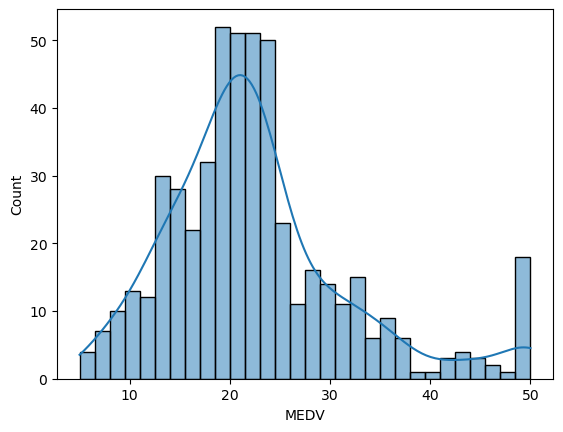

In [62]:
#Detail histogram of target - MEDV
sns.histplot(df['MEDV'], bins = 30, kde= True)
plt.show()

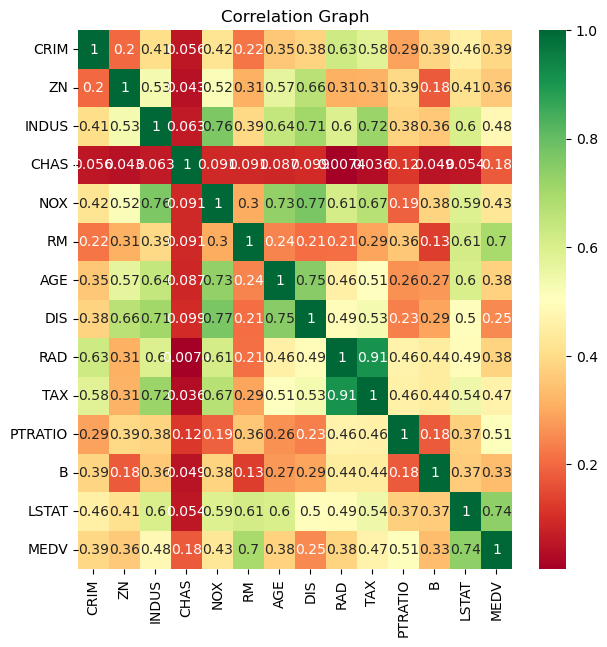

In [63]:
#4.1 Correlation Heatmap
cr = df.corr().abs()
plt.figure(figsize=(7,7))
plt.title("Correlation Graph")
sns.heatmap(cr, annot = True, cmap='RdYlGn')
plt.show()

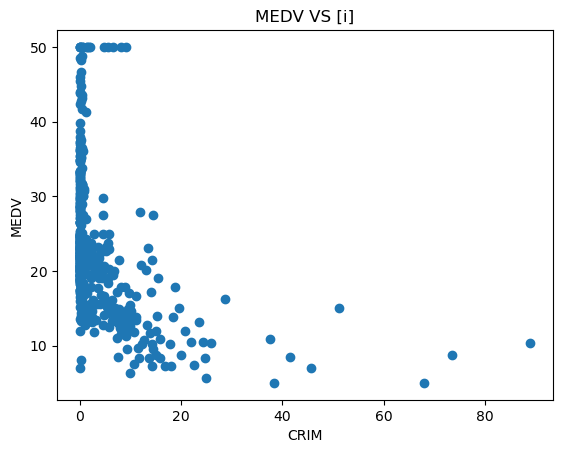

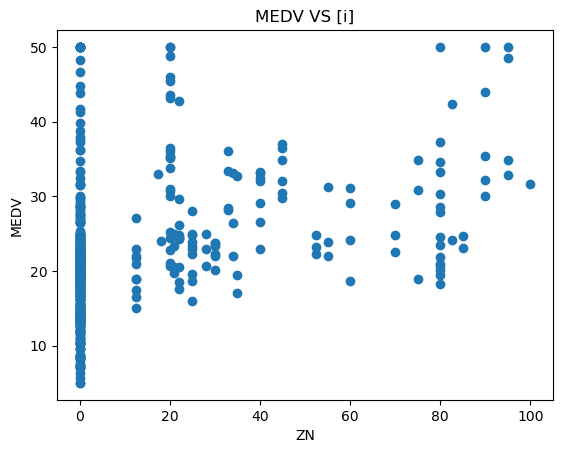

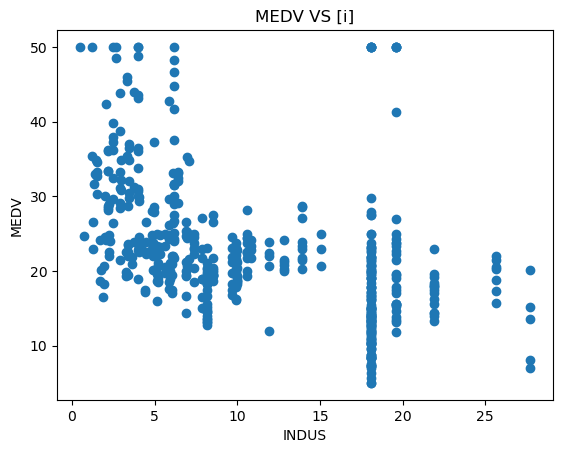

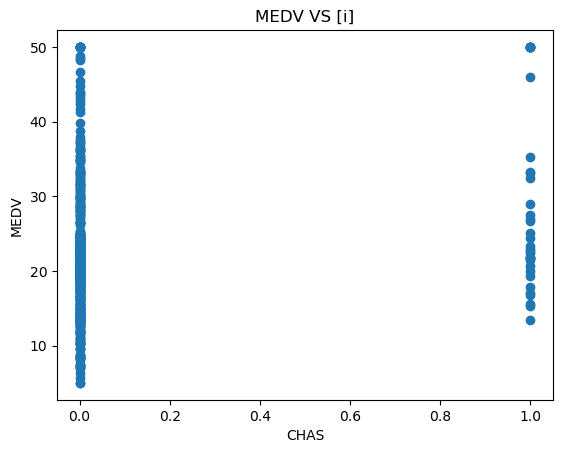

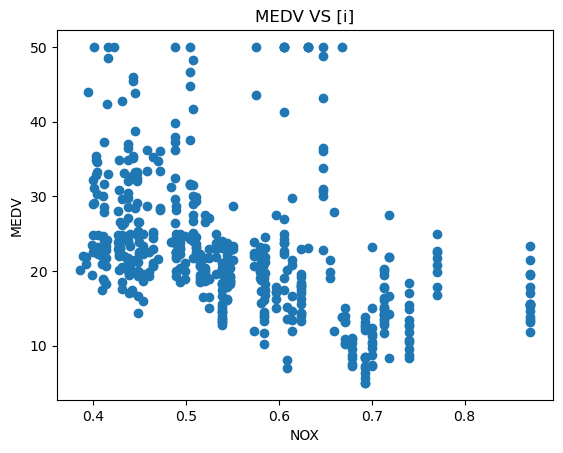

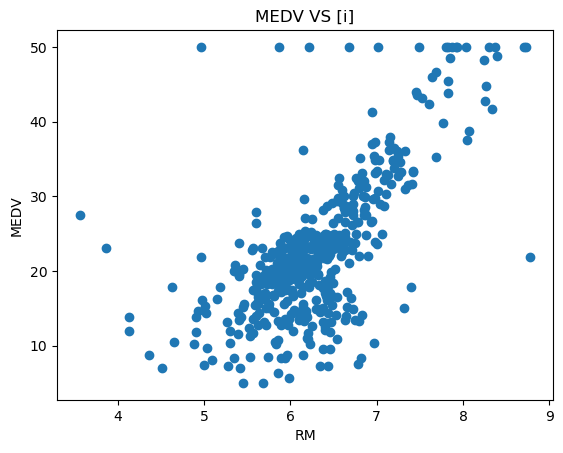

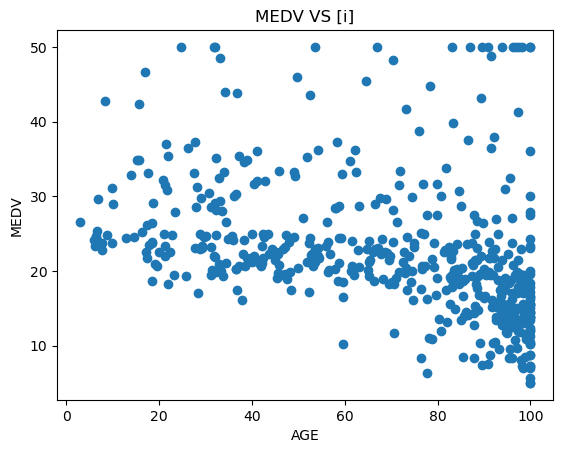

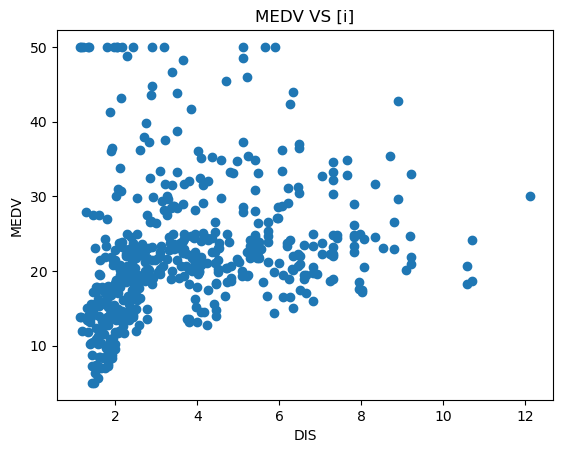

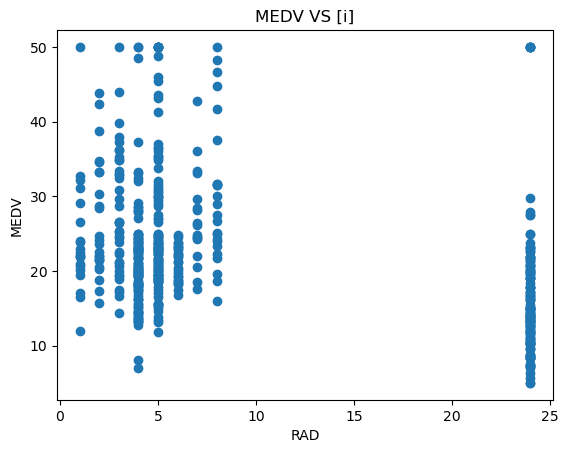

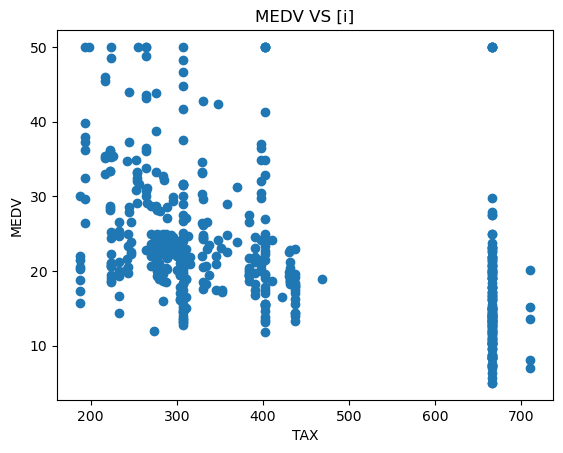

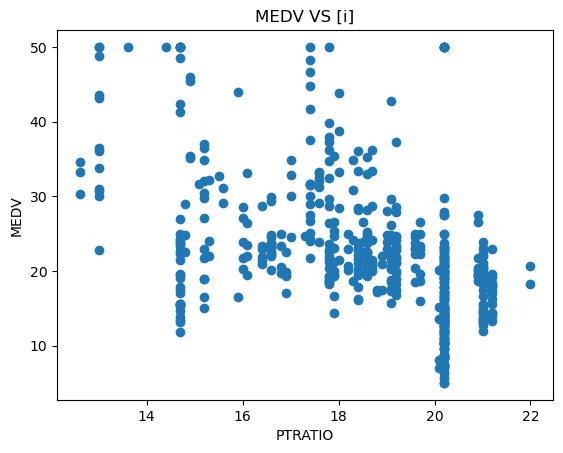

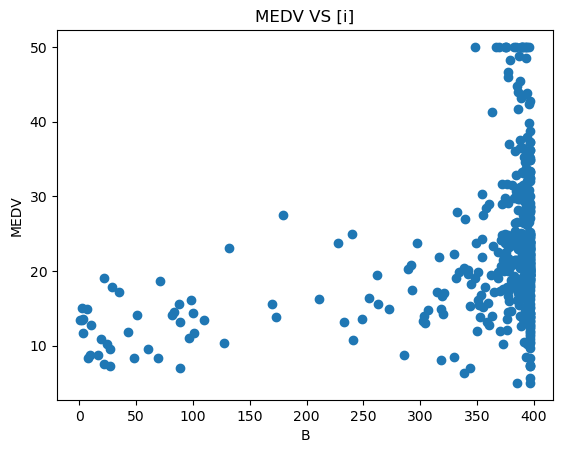

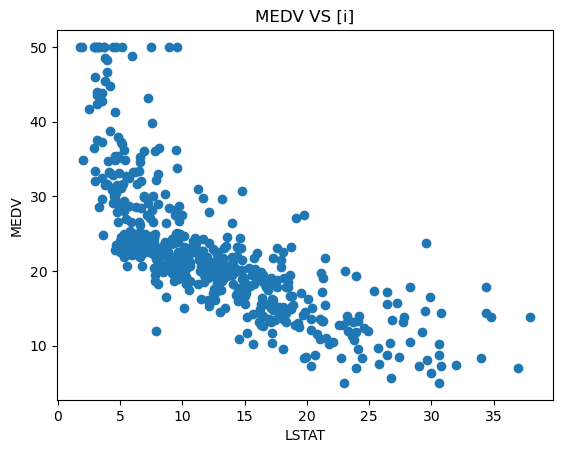

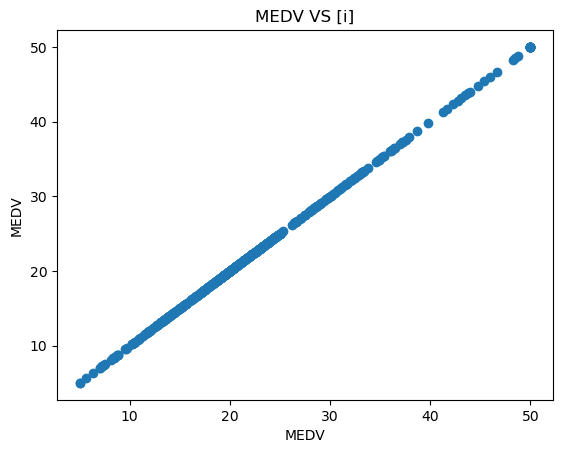

In [64]:
#4.2 Scatterplot/ Relationship plot
for i in column_name:
    plt.scatter(df[i], df['MEDV'])
    plt.title("MEDV VS [i]")
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.show()

In [65]:
#5.Features selection
#separate features and target variable
X = df.drop(['CHAS', 'MEDV'], axis =1) #Feature
y = df['MEDV'] #target variable

In [66]:
#6.Data Preprocessing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split (X, y, test_size= 0.2, random_state= 13)

In [67]:
#7.0 Model Training/Model Pipeline

#create a pipeline for
#Min Max Scaler
#Standard Scaler
#Lasso Regression
#Ridge Regression
#Linear Regression
#SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error as MSE, r2_score as R2, \
                                mean_absolute_percentage_error as MAPE

SS = StandardScaler()
MMS = MinMaxScaler()
LR = LinearRegression()
R = Ridge()
L = Lasso()
SVR = SVR()

pipeline_mms_lr = Pipeline([('mms',MMS),('LR', LR)])
pipeline_ss_lr = Pipeline([('s',SS),('LR', LR)])

pipeline_mms_r = Pipeline([('mms',MMS),('LR', R)])
pipeline_ss_r = Pipeline([('ss',SS),('LR', R)])

pipeline_mms_l = Pipeline([('mms',MMS),('LR', L)])
pipeline_ss_l = Pipeline([('ss',SS),('LR', L)])

pipeline_mms_svr = Pipeline([('mms',MMS),('LR', SVR)])
pipeline_ss_svr = Pipeline([('ss',SS),('LR', SVR)])

In [68]:
PP = [pipeline_mms_lr, pipeline_ss_lr,
      pipeline_mms_r, pipeline_ss_r,
      pipeline_mms_l, pipeline_ss_l,
      pipeline_mms_svr,pipeline_ss_svr]

PP_names = ['MinMAxScaler + LinearRegression',
            'StandardScaler + LinearRegression',
            'MinMaxScaler + Ridge',
            'StandardScaler + Ridge',
            'MinMAxScaler + Lasso',
            'StandardScaler + Lasso',
            'MinMAxScaler + SVR',
            'StandardScaler + SVR']

In [69]:
model_error_df = pd.DataFrame(columns = ['Model','MSE', 'RMSE', 'MAPE'])
#pipe_score = pd.DataFrame[]
#pipe_score.columns = PP_names
#Loop over each pipeline, train it, and evaluate the performance
for i in range (len(PP)):
    
    #Train the model
    PP[i].fit(X_train, y_train)
    #Prediction of the test set
    y_pred = PP[i].predict(X_test)
#calculate the metrics
    mse_score= MSE(y_test, y_pred)
    mape_score=MAPE(y_test, y_pred)
    rmse_score=np.sqrt(mse_score)
    r2_scores = R2(y_test, y_pred)


    errors = pd.DataFrame({'Model': [PP_names[i]],
                                'MSE': [mse_score],
                                'MAPE': [mape_score],
                                'RMSE': [rmse_score],
                                'R2': [r2_scores]})

    
    model_error_df = pd.concat([model_error_df, errors])

In [73]:
#print the model scores
print(model_error_df.sort_values(by=['MSE', 'RMSE', 'MAPE','R2'], ascending = True))

                               Model        MSE      RMSE      MAPE        R2
0               MinMaxScaler + Ridge  24.038044  4.902861  0.190189  0.734857
0             StandardScaler + Ridge  24.928141  4.992809  0.205740  0.725039
0  StandardScaler + LinearRegression  25.023112  5.002311  0.206722  0.723992
0    MinMAxScaler + LinearRegression  25.023112  5.002311  0.206722  0.723992
0               StandardScaler + SVR  28.305453  5.320287  0.166731  0.687787
0             StandardScaler + Lasso  28.767246  5.363511  0.216327  0.682694
0                 MinMAxScaler + SVR  30.184901  5.494079  0.152495  0.667057
0               MinMAxScaler + Lasso  65.042885  8.064917  0.347265  0.282569


In [71]:
best_model = model_error_df.iloc[model_error_df['MSE'].idxmax()]
best_models = f"The best model is {best_model['Model']} with MSE score of {best_model['MSE']} and MAPE score of {best_model['MAPE']} and R2 score of {best_model['R2']}"
print(best_models)

The best model is MinMAxScaler + LinearRegression with MSE score of 25.02311239516367 and MAPE score of 0.20672205356081882 and R2 score of 0.7239918358391897


In [72]:
#8.0 Model Evaluation - to see the model performance

#fit the pipeline and predict the target

#calculate the metrix
#mse errors score
#mape score
#rmse score

#What is the best score? The ones with lowest errors

#What is the best model?

